This notebook generates Figure 5

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
import matplotlib as mpl
import matplotlib.patches as mpatches
from statsmodels.stats.multitest import multipletests
from matplotlib.ticker import PercentFormatter
from qgrid import show_grid
from scipy.stats import sem

plt.rcParams['font.family'] = 'Arial'
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['font.size'] = 22
# plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sns.set_palette("Dark2")

In [3]:
method_colors = {
    'PCA':'#66c2a5', 
    'UMAP':'#fc8d62', 
    'MOFA':'#8da0cb', 
    'MOLI':'#e78ac3', 
    'DIABLO':'#a6d854', 
    'iClusterBayes':'#ffd92f',
    'iClusterPlus': '#d8b365',
    'EC': '#addad6',
    'moCluster': '#a32638'
}

# drug

In [4]:
df_pca = pd.read_csv("../result_files/PCA_MAE.csv", index_col=0)
df_pca['method'] = "PCA"
df_umap = pd.read_csv("../result_files/UMAP_MAE.csv", index_col=0)
df_umap['method'] = "UMAP"
df_MOFA = pd.read_csv("../result_files/MOFA_MAE.csv", index_col=0)
df_MOFA['method'] = "MOFA"
df_MOLI = pd.read_csv("../result_files/MOLI_MAE.csv", index_col=0)
df_MOLI['method'] = "MOLI"
df_MOLI_2022 = pd.read_csv("../result_files/MOLI_MAE_20220107.csv", index_col=0)
df_MOLI_2022['method'] = "MOLI_2022"
df_iClusterPlus = pd.read_csv("../result_files/iClusterPlus_MAE.csv", index_col=0)
df_iClusterPlus['method'] = "iClusterPlus"
df_iClusterBayes = pd.read_csv("../result_files/iClusterBayes_MAE.csv", index_col=0)
df_iClusterBayes['method'] = "iClusterBayes"
df_DIABLO = pd.read_csv("../result_files/DIABLO_MAE.csv", index_col=0)
df_DIABLO['method'] = "DIABLO"
df_mo = pd.read_csv("../result_files/moCluster_MAE.csv", index_col=0)
df_mo['method'] = "moCluster"
df_EC = pd.read_csv("../result_files/EarlyConcatenation_MAE.csv", index_col=0)
df_EC['method'] = "EC"

In [5]:
print(df_EC['avg'].mean())
print(df_pca['avg'].mean())
print(df_umap['avg'].mean())
print(df_MOFA['avg'].mean())
print(df_MOLI['avg'].mean())
print(df_MOLI_2022['avg'].mean())

print(df_iClusterPlus['avg'].mean())
print(df_iClusterBayes['avg'].mean())
print(df_mo['avg'].mean())


0.12388462177806124
0.12722532704496897
0.13111487414135709
0.1279482646432852
0.6400398823808241
0.5236707692605685
0.12742924521540078
0.13094602481154408
0.12523751375212763


In [6]:
print(sem(df_EC['avg']))
print(sem(df_pca['avg']))
print(sem(df_umap['avg']))
print(sem(df_MOFA['avg']))
print(sem(df_MOLI['avg']))
print(sem(df_MOLI_2022['avg']))
print(sem(df_iClusterPlus['avg']))
print(sem(df_iClusterBayes['avg']))
print(sem(df_mo['avg']))

0.0013871528990164555
0.0013894413475255515
0.0014260724014999824
0.001392751448792601
0.006926742364418336
0.003508112406779935
0.0013823591064828099
0.0014190487244195502
0.0013926528785887572


In [5]:
df_combined = pd.concat([
    df_pca, df_MOFA, df_iClusterPlus, df_iClusterBayes,
    df_DIABLO, df_mo, df_EC
])

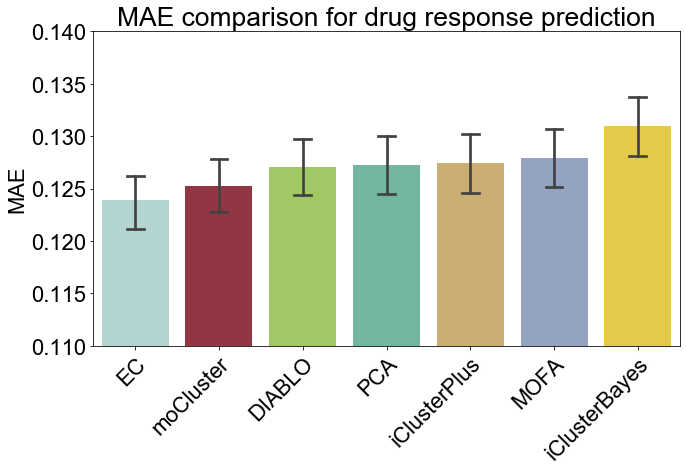

In [6]:
fig = plt.figure(figsize=(10,7))
order = df_combined.groupby(['method'])['avg'].mean().sort_values().index
sns.barplot(x='method', y='avg', data=df_combined, capsize=.2, order=order, palette=method_colors)
plt.ylim(0.11, 0.14)
plt.xlabel("")
plt.ylabel("MAE")
plt.title("MAE comparison for drug response prediction")
plt.xticks(rotation=45,
         rotation_mode='anchor',
         ha='right')
plt.tight_layout()
plt.savefig("../plots/drug_comparison.pdf",dpi=300)

In [8]:
ttest_rel(df_EC['avg'], df_mo['avg'])

Ttest_relResult(statistic=-18.30024476880568, pvalue=1.8552742220104547e-67)

In [9]:
ttest_rel(df_mo['avg'], df_DIABLO['avg'])

Ttest_relResult(statistic=-15.407372834108472, pvalue=1.031741089908473e-49)

In [21]:
ttest_rel(df_pca['avg'], df_DIABLO['avg'])

Ttest_relResult(statistic=1.0356597887329102, pvalue=0.3005339317593839)

In [10]:
ttest_rel(df_pca['avg'], df_iClusterPlus['avg'])

Ttest_relResult(statistic=-1.5621805391540327, pvalue=0.11846412740308884)

In [11]:
ttest_rel(df_iClusterPlus['avg'], df_MOFA['avg'])

Ttest_relResult(statistic=-3.8960535216027794, pvalue=0.00010223604078576329)

In [12]:
ttest_rel(df_MOFA['avg'], df_iClusterBayes['avg'])

Ttest_relResult(statistic=-17.24732127302477, pvalue=9.114121037934892e-61)

# cancer type

In [20]:
df_cancer_type = pd.read_csv("../result_files/cancer_type.csv")
df_cancer_type['model'] = df_cancer_type['model'].map(lambda x:x.replace("EarlyConcatenation", "EC"))

In [21]:
df_cancer_type = df_cancer_type[df_cancer_type['model']!='UMAP']

In [22]:
df_cancer_type = pd.melt(df_cancer_type,
                         value_vars=[f"cv{i}" for i in range(500)],
                         value_name='Accuracy',
                         id_vars='model')

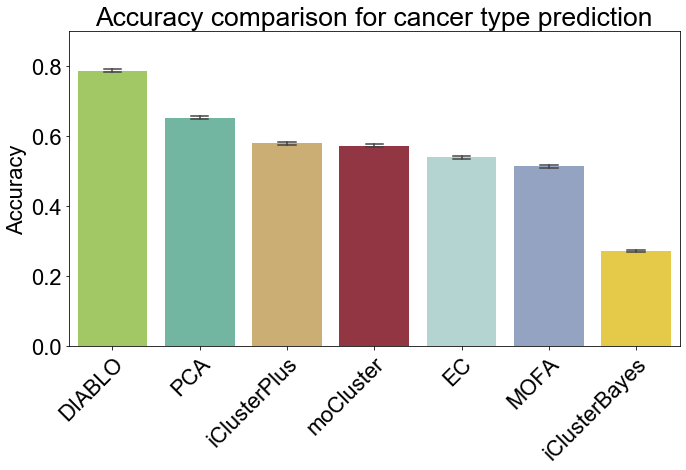

In [34]:
fig = plt.figure(figsize=(10, 7))
order = df_cancer_type.groupby(
    ['model'])['Accuracy'].mean().sort_values(ascending=False).index
sns.barplot(x='model',
            y='Accuracy',
            data=df_cancer_type,
            order=order,
            capsize=.2,
            errwidth=1.5,
            palette=method_colors)
plt.xlabel("")
plt.ylim((0, 0.9))
plt.ylabel("Accuracy")
plt.title("Accuracy comparison for cancer type prediction")
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
plt.tight_layout()
plt.savefig("../plots/cancer_type_comparison.pdf", dpi=300)

In [17]:
ttest_ind(df_cancer_type[df_cancer_type['model'] == 'DIABLO']['Accuracy'],
          df_cancer_type[df_cancer_type['model'] == 'PCA']['Accuracy'])

Ttest_indResult(statistic=41.39783929629649, pvalue=7.477272061626019e-219)

In [18]:
ttest_ind(df_cancer_type[df_cancer_type['model'] == 'iClusterPlus']['Accuracy'],
          df_cancer_type[df_cancer_type['model'] == 'moCluster']['Accuracy'])

Ttest_indResult(statistic=1.8982872945400606, pvalue=0.057946531553209966)

In [19]:
ttest_ind(df_cancer_type[df_cancer_type['model'] == 'moCluster']['Accuracy'],
          df_cancer_type[df_cancer_type['model'] == 'EC']['Accuracy'])

Ttest_indResult(statistic=11.152390897366987, pvalue=2.652628570910029e-27)

# runtime

In [12]:
df_runtime = pd.read_excel("../runtime.xlsx", sheet_name='combined')

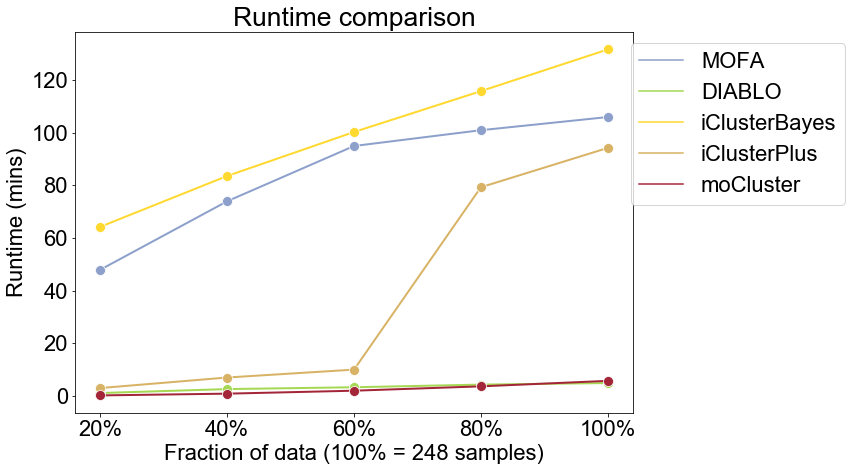

In [5]:
fig = plt.figure(figsize=(10, 7))
ax = sns.lineplot(x='fraction_of_data',
                  y='runtime (mins)',
                  hue='method',
                  data=df_runtime,
                  palette=method_colors,
                  linewidth=2,
                  markers=True,
                  marker='o',
                  markersize=10)
ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1])
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
plt.xlabel("Fraction of data (100% = 248 samples)")
plt.ylabel("Runtime (mins)")
plt.title("Runtime comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
# plt.tight_layout()
plt.savefig("../plots/runtime.pdf", dpi=300)

# time vs accuracy scatter

In [4]:
df_pca = pd.read_csv("../result_files/PCA_MAE.csv", index_col=0)
df_pca['method'] = "PCA"
df_umap = pd.read_csv("../result_files/UMAP_MAE.csv", index_col=0)
df_umap['method'] = "UMAP"
df_MOFA = pd.read_csv("../result_files/MOFA_MAE.csv", index_col=0)
df_MOFA['method'] = "MOFA"
df_MOLI = pd.read_csv("../result_files/MOLI_MAE.csv", index_col=0)
df_MOLI['method'] = "MOLI"
df_iClusterPlus = pd.read_csv("../result_files/iClusterPlus_MAE.csv", index_col=0)
df_iClusterPlus['method'] = "iClusterPlus"
df_iClusterBayes = pd.read_csv("../result_files/iClusterBayes_MAE.csv", index_col=0)
df_iClusterBayes['method'] = "iClusterBayes"
df_DIABLO = pd.read_csv("../result_files/DIABLO_MAE.csv", index_col=0)
df_DIABLO['method'] = "DIABLO"
df_mo = pd.read_csv("../result_files/moCluster_MAE.csv", index_col=0)
df_mo['method'] = "moCluster"

In [8]:
df_drug_combined = pd.concat([
    df_pca, df_umap, df_MOFA, df_iClusterPlus, df_iClusterBayes,
    df_DIABLO, df_mo
])

df_drug_combined = df_drug_combined.groupby('method').median().reset_index()
df_drug_combined = df_drug_combined.rename(columns={'avg':'Drug MAE'})

In [9]:
df_cancer_type = pd.read_csv("../result_files/cancer_type.csv")[['model', 'avg']]
df_cancer_type = df_cancer_type.rename(columns={'avg': 'Cancer type accuracy'})
df_runtime = pd.read_excel("../runtime.xlsx", sheet_name='combined')
df_runtime = df_runtime[df_runtime['fraction_of_data']==1].drop(['fraction_of_data'], axis=1)

In [10]:
df_runtime = df_runtime.append({'method': 'PCA', 'runtime (mins)':0.00003}, ignore_index=True)
df_runtime = df_runtime.append({'method': 'UMAP', 'runtime (mins)':0.03}, ignore_index=True)

In [11]:
df_time_accuracy = pd.merge(df_runtime,
                            df_cancer_type,
                            left_on=['method'],
                            right_on=['model'])
df_time_accuracy = pd.merge(df_time_accuracy, df_drug_combined, on=['method'])

In [12]:
df_time_accuracy['log(runtime)'] = np.log1p(df_time_accuracy['runtime (mins)'])

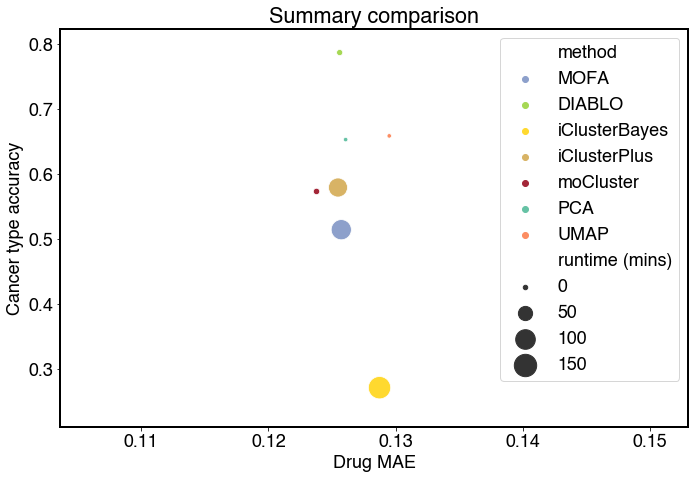

In [24]:
sns.scatterplot(x='Drug MAE',
                y='Cancer type accuracy',
                hue='method',
                data=df_time_accuracy,
                palette=method_colors,
                size='runtime (mins)',
                sizes=(20, 500))
plt.title("Summary comparison")
plt.tight_layout()
plt.savefig("../plots/summary.pdf", dpi=500)

In [15]:
df_time_accuracy[[
    'method', 'Cancer type accuracy', 'Drug MAE', 'log(runtime)',
    'runtime (mins)'
]].to_csv("../result_files/radar_results.csv", index=False)

# radar

In [13]:
df = pd.read_csv("../result_files/radar_results.csv").set_index('method').drop(['runtime (mins)'], axis=1)

In [14]:
df['Drug MAE'] = -1 * df['Drug MAE']
df['log(runtime)'] = -1 * df['log(runtime)']


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
df = df.drop('impact_factor', axis=1)

In [17]:
df_norm = pd.DataFrame(MinMaxScaler(feature_range=(0.1, 1)).fit_transform(df),
                       index=df.index,
                       columns=df.columns)

In [18]:
df_norm = df_norm.reset_index()

In [24]:
df_norm = df_norm[df_norm['method']!='UMAP'].reset_index(drop=True)

In [25]:
methods = df_norm['method'].values

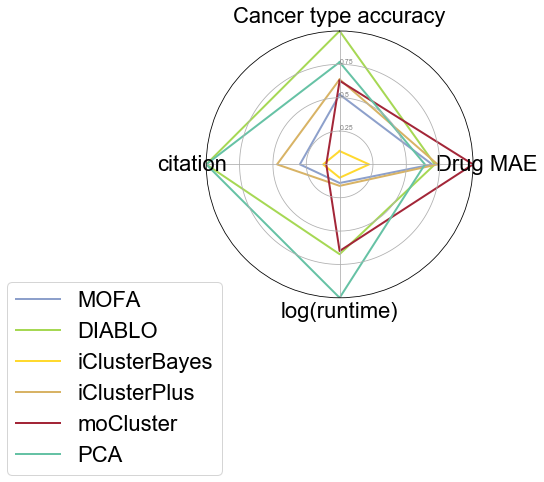

In [27]:
from math import pi

categories = list(df_norm)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
plt.ylim(0, 1)

for i in range(len(methods)):
    values = df_norm.loc[i].drop('method').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles,
            values,
            linewidth=2,
            linestyle='solid',
            label=methods[i],
            c=method_colors[methods[i]],
            zorder=-1)
    # ax.fill(angles, values, 'b', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.savefig("../plots/summary.pdf", dpi=300)